## Описание проекта.

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

## Постановка задачи.

### Подготовьте данные

 - Замените названия столбцов (приведите к нижнему регистру);
 - Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;
 - Обработайте пропуски при необходимости:
 - Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
 - Опишите причины, которые могли привести к пропускам;
 - Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберите это значение и   опишите, как его обработать;
 - Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец

### Проведите исследовательский анализ данных

 - Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
 - Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
 - Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
 - Не учитывайте в работе данные за предыдущие годы.
 - Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
 - Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
 - Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
 - Соотнесите выводы с продажами игр на других платформах.
 - Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

### Составьте портрет пользователя каждого региона

Определите для пользователя каждого региона (NA, EU, JP):
 - Самые популярные платформы (топ-5). Опишите различия в долях продаж.
 - Самые популярные жанры (топ-5). Поясните разницу.
 - Влияет ли рейтинг ESRB на продажи в отдельном регионе?

### Проверьте гипотезы

 - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
 - Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
 - Задайте самостоятельно пороговое значение alpha.
 
Поясните:

 - Как вы сформулировали нулевую и альтернативную гипотезы;
 - Какой критерий применили для проверки гипотез и почему.

### Напишите общий вывод

## Описание данных

 - Name — название игры
 - Platform — платформа
 - Year_of_Release — год выпуска
 - Genre — жанр игры
 - NA_sales — продажи в Северной Америке (миллионы проданных копий)
 - EU_sales — продажи в Европе (миллионы проданных копий)
 - JP_sales — продажи в Японии (миллионы проданных копий)
 - Other_sales — продажи в других странах (миллионы проданных копий)
 - Critic_Score — оценка критиков (максимум 100)
 - User_Score — оценка пользователей (максимум 10)
 - Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.
 
Данные за 2016 год могут быть неполными.

**Импортируем библиотеки**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy.stats import levene
from collections import Counter

## Шаг 1. Откроем файл с данными и изучим общую информацию.


In [2]:
data = pd.read_csv('/datasets/games.csv')

In [3]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
data.tail()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


**Названия колонок необходимо привести к одному регистру.** 

In [5]:
data.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

**В данных есть пропуски.**

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Тип данных  некоторых колонок не совсем корректно соотвествует содержимым данным.**

**Например:**

1. **Колонка "год выпуска" содержит дату в формате float.**


2. **Колонка "Оценка критиков" указана в формате float.**


3. **Колонка "user_object" в формате object.**

In [7]:
print('\nКоличество явных дубликатов - ',data.duplicated().sum())


Количество явных дубликатов -  0


**Явных дубликатов не наблюдается.**

### Вывод:

1. **В данных есть пропуски.**


2. **Названия колонок находяться в разных регистрах.**


3. **Тип данных некоторых колонок не соответствует содержимому.**

## Шаг 2. Подготовим данные.

### Скорректируем названия колонок.

**Приведем все названия столбцов к одному регистру с помощью метода rename().**

In [8]:
# new_name_columns = {}
# nms_column = data.columns
# for name in nms_column:
#     new_name_columns[name] = str.lower(name)
# data = data.rename(columns = new_name_columns)

data.columns = data.columns.str.lower()

In [9]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


**Приведу содержимое колонок: "name", "platform", "genre", "rating" к нижнему регистру, для удобства последующих дополнительных проверок.**

In [10]:
for column_name in ["name", "platform", "genre", "rating"]:
    data[column_name] = data[column_name].str.lower()

In [11]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8,e
1,super mario bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,e
3,wii sports resort,wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8,e
4,pokemon red/pokemon blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Преобразуем данные в нужные типы и заполним пропуски.

In [12]:
data[(data['name'].isna()) & (data['genre'].isna())]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,gen,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,gen,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


**Строк с пропусками в колонках "name" и "genre" всего две. Возможно данные не указали при составлении таблицы.**     
**Корректного способа заполнить эти пропуски нет, поэтому удалим такие строки.**

In [13]:
data = data.dropna(subset=['name'])

**Заполним пропуски в колонке "year_of_release" и укажем только год в формает int.**

**Некоторые игры выходили одновременно (в один год) для различных платформ. Проверим есть ли эти же игры для других платформ и с датой релиза. Если есть, то заполним пропуски датой выхода как у найденной версии игры для другой платформы.**

**Если версии игры не найдена для другой платформы или найдена, но нигде не указана дата выхода, то другого корректного способа заполнить пропуск нет. Тогда просто удалим такие строки.**

In [14]:
print('\nКоличество пропусков в столбе "год релиза" до обработки - ', data['year_of_release'].isna().sum())


Количество пропусков в столбе "год релиза" до обработки -  269


In [15]:
data['year_of_release'] = data['year_of_release'].fillna(data.groupby('name')['year_of_release'].transform('median'))
data = data.dropna(subset=['year_of_release'])

In [16]:
print('\nКоличество пропусков в столбе "год релиза" после обработки - ', data['year_of_release'].isna().sum())


Количество пропусков в столбе "год релиза" после обработки -  0


In [17]:
data['year_of_release'] = pd.to_datetime(data['year_of_release'], format='%Y').dt.year

In [18]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8,e
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,e
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8,e
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


**Пропуски в колонке "оценка критиков" можно было бы заполнить медианной оценкой основаной на группе по платформе и жанре игры. Но, считаю, что такое действие может исказить данные.**

**Так как показатель типа рейтинг является качественной переменной( порядковой), то пропущенные значения в ячейке "оценка критиков" я буду заменять на -1 (группа для пропущенных значений).**

**Значения могли быть пропущенны по технологическим причинам или по причине не существования на момент выхода  игры оценивающего издания ,  или игра просто не оценивалась (игра выпускалась только для внутреннего рынка, не популярный жанр, определенная возрастная аудитория).**

In [19]:
print('\nКоличество пропусков в столбе "оценка критиков" до обработки - ', data['critic_score'].isna().sum())


Количество пропусков в столбе "оценка критиков" до обработки -  8492


In [20]:
# data['critic_score'] = data['critic_score'].fillna(data.groupby(['platform', 'genre'])['critic_score'].transform('median'))

data['critic_score'] = data['critic_score'].fillna(-1)

In [21]:
print('\nКоличество пропусков в столбе "оценка критиков" после обработки - ', data['critic_score'].isna().sum())


Количество пропусков в столбе "оценка критиков" после обработки -  0


In [22]:
data['critic_score'] = data['critic_score'].round(0).astype('Int64')

**Пропуски в колонке "оценка пользователей" можно было бы заполнить медианной оценкой основаной на группе по платформе и жанре игры. Но, считаю, что такое действие может исказить данные.**

**Так как показатель типа рейтинг является качественной переменной( порядковой), то пропущенные значения в ячейке "оценка пользователей" я буду заменять на -1 (группа для пропущенных значений).**

**Значения могли быть пропущенны по технологическим причинам ,  или просто не оценивалась (игра выпускалась только для внутреннего рынка, не популярный жанр, определенная возрастная аудитория).**

**Изменим тип данных на float32, как на сайте Metacritic.**

In [23]:
data['user_score'].unique() #Посмотрим на содержимое колонки

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

**В колонке присутсвует абривиатура TBD(To Be Discussed) - подлежит обсуждению, то есть значит,что оценка не определена. Заменим абривиатуру на NaN.**

In [24]:
data['user_score'] = data['user_score'].replace('tbd', np.nan)

In [25]:
print('\nКоличество пропусков в столбе "оценка игроков" до обработки - ', data['user_score'].isna().sum())


Количество пропусков в столбе "оценка игроков" до обработки -  9027


In [26]:
# data['user_score'] = data['user_score'].fillna(data.query('user_score != "tbd"').groupby(['platform', 'genre'])['user_score'].transform('median'))
data['user_score'] = data['user_score'].fillna(-1)

In [27]:
print('\nКоличество пропусков в столбе "оценка игроков" после первой обработки - ', data['user_score'].isna().sum())


Количество пропусков в столбе "оценка игроков" после первой обработки -  0


In [28]:
data['user_score'] = data['user_score'].astype('float32', errors='ignore')

In [29]:
data.tail()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16710,samurai warriors: sanada maru,ps3,2016,action,0.00,0.00,0.01,0.0,-1,-1.0,NaN
16711,lma manager 2007,x360,2006,sports,0.00,0.01,0.00,0.0,-1,-1.0,NaN
16712,haitaka no psychedelica,psv,2016,adventure,0.00,0.00,0.01,0.0,-1,-1.0,NaN
16713,spirits & spells,gba,2003,platform,0.01,0.00,0.00,0.0,-1,-1.0,NaN
16714,winning post 8 2016,psv,2016,simulation,0.00,0.00,0.01,0.0,-1,-1.0,NaN


**Игры с разным жанром могут иметь разные возрастные ограничения. Кроме того, некоторым играм могло быть не присвоено возрастное ограничение.**

**Пропуски с возрастной категорией заменю на маркерное значение "NR"(Нет рейтинга).**

In [30]:
print('\nКоличество пропусков в столбце "возрастной рейтинг" до обработки - ', data['rating'].isna().sum())


Количество пропусков в столбце "возрастной рейтинг" до обработки -  6699


In [31]:
# dict_with_genre_and_most_common_rating = {}
# for g in data['genre'].unique():
#     l = data.query('genre == @g')['rating']
#     l2 = Counter(l).most_common()
#     if pd.isna(l2[0][0]):
#         dict_with_genre_and_most_common_rating[g] = l2[1][0]
#     else:
#         dict_with_genre_and_most_common_rating[g] = l2[0][0]
        
# def get_rating(row):
#     if pd.isna(row['rating']):
#         r = dict_with_genre_and_most_common_rating[row['genre']]
#         return r

            
# data['rating'] = data['rating'].fillna(data.apply(get_rating, axis=1))
data['rating'] = data['rating'].fillna('nr')

In [32]:
print('\nКоличество пропусков в столбце "возрастной рейтинг" после обработки - ', data['rating'].isna().sum())


Количество пропусков в столбце "возрастной рейтинг" после обработки -  0


### Посчитаем суммарные продажи во всех регионах и запишим их в отдельный столбец.

In [33]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [34]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76,8.0,e,82.54
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,-1,-1.0,nr,40.24
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82,8.3,e,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80,8.0,e,32.77
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,-1,-1.0,nr,31.38


### Вывод

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16567 entries, 0 to 16714
Data columns (total 12 columns):
name               16567 non-null object
platform           16567 non-null object
year_of_release    16567 non-null int64
genre              16567 non-null object
na_sales           16567 non-null float64
eu_sales           16567 non-null float64
jp_sales           16567 non-null float64
other_sales        16567 non-null float64
critic_score       16567 non-null Int64
user_score         16567 non-null float32
rating             16567 non-null object
total_sales        16567 non-null float64
dtypes: Int64(1), float32(1), float64(5), int64(1), object(4)
memory usage: 1.6+ MB


**Согласно ответам ЯНДЕКСА на поисковые запросы :"Крупные издания, занимавшиеся/занимающиеся оценками компьютерных игр начали свою деятельность примерно с 2000 года".**

**Возможно у большинства игр  нет оценки критиков и пользователей потому, что контент выходил до 2000 года, неопределенность пользовательских мнений (как в случае с TBD), не популярность жанра или платформы, ограниченный релиз( только для внутреннего рынка конкретной страны. Например, для Японии), определенная возрастная категория( для детей, например) или технологическая ошибка.**

**Показатель типа рейтинг/оценка является качественной переменной(порядковой), пропущенные значения в ячейках с порядковым значениями заменили на ноль (группа для пропущенных значений).**

## Шаг 3. Исследовательский анализ данных.

### Посмотрим, сколько игр выпускалось в разные годы.

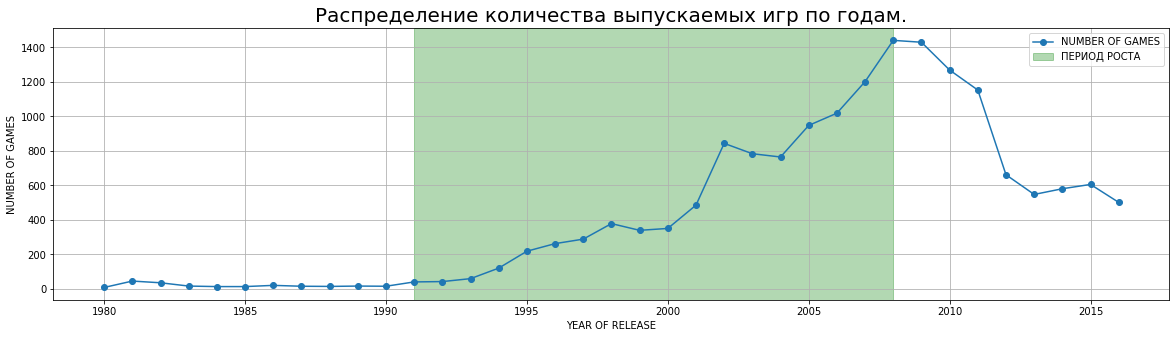

In [36]:
plt.figure(figsize=(20, 5))
plt.title('Распределение количества выпускаемых игр по годам.', fontsize=20)
plt.ylabel('NUMBER OF GAMES')
plt.xlabel('YEAR OF RELEASE')
plt.plot(data.groupby('year_of_release')['name'].count(), 'o-', label='NUMBER OF GAMES', alpha=1)
plt.axvspan(1991, 2008, color='green', label='ПЕРИОД РОСТА', alpha=0.3)
plt.grid(True)
plt.legend();

**По графику видно, что рост количества выпускаемых компьютерных игр идет в период с 1991 по 2008 год, в 2008 максимальное количество выпущенных игр - 1441. После 2008 количество выпускаемых игр идет на спад. До 1991 года количество игр держится примерно на одном уровне.**

**До 1990 года была эпоха старых консолей, потому и количетсво выпускаемых игр было не велико.В 1991 году выходит SNES, консоль нового поколения, начинается популяризация видео игр. 2008 год  - год начала Мирового экономического кризиса, как следствие количество выпускаемых игр пошло на спад.**

### Посмотрим, как менялись продажи по платформам и за какой характерный срок появляются новые и исчезают старые платформы.

**Определим самые популярные платформы с наибольшим количеством проданных игр.**

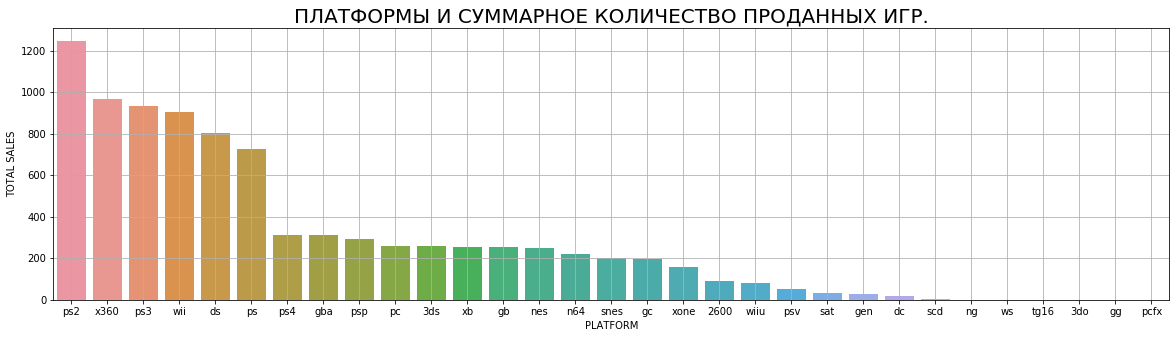

In [37]:
# Сгруппирую платформы и суммарные продажи и упорядочу по убыванию значения суммарных продаж для наглядного отображения.
all_platform_and_total_sales = data.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)
plt.figure(figsize=(20, 5))
plt.title('ПЛАТФОРМЫ И СУММАРНОЕ КОЛИЧЕСТВО ПРОДАННЫХ ИГР.', fontsize=20)
sns.barplot(x=all_platform_and_total_sales.index, y=all_platform_and_total_sales['total_sales'])
plt.ylabel('TOTAL SALES')
plt.xlabel('PLATFORM')
plt.grid(True);

**С наибольшим отрывом от остальных лидирующие позиции занимают 6 платформ.**

**PS4, XBOXONE не менее популярные платформы, хотя и не попали в список лидеров. Вполне возможно это связано с тем, что консоли с момента выхода не обзавелись большой библиотекой игр на момент составления отчета.**

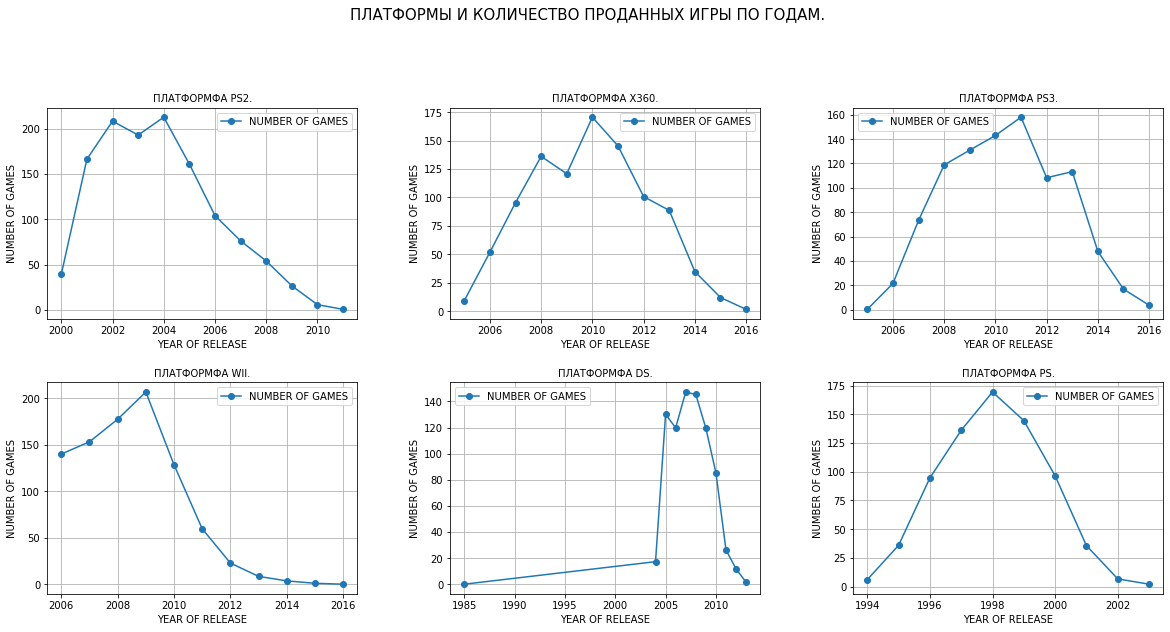

In [38]:
position = 0
top_platform = all_platform_and_total_sales.reset_index()['platform'].head(6)
plt.figure(figsize=[20, 14])
plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.suptitle('ПЛАТФОРМЫ И КОЛИЧЕСТВО ПРОДАННЫХ ИГРЫ ПО ГОДАМ.', fontsize=15)
for name_of_platform in top_platform:
    position += 1
    pvt = data.query('platform == @name_of_platform').pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
    plt.subplot(3, 3, position)
    plt.title(f'ПЛАТФОРМФA {name_of_platform.upper()}.', fontsize=10)
    plt.plot(pvt, 'o-', label='NUMBER OF GAMES', alpha=1)
    plt.ylabel('NUMBER OF GAMES')
    plt.xlabel('YEAR OF RELEASE')
    plt.grid(True)
    plt.legend()
plt.show();

In [39]:
list_with_life_cycle_of_consoles = []
for name_platform in top_platform:
    life_cycle = data.query('(platform == @name_platform)').pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').count()
    list_with_life_cycle_of_consoles.append(life_cycle)
mean_life_cycle = int(np.mean(list_with_life_cycle_of_consoles))
print(f'\nСредний жизненный цикл платформы - {mean_life_cycle} лет')


Средний жизненный цикл платформы - 11 лет


**По представлениям на графиках можно сказать, что в среднем консоль живет около 11 лет.**

**Почти все платформы на графиков имеют тенденцию спада количества выпускаемых игр к 2016 году (составлению отчета).**

### Актуальный период для составления прогноза на 2017 год.

**Учитывая полученные выше выводы, актуальный период для составления прогноза на 2017 год будет начинатся с 2012 года.**

###  Посмотрим какие платформы лидируют по продажам, растут или падают. Выберем несколько потенциально прибыльных платформ.

In [40]:
df_with_forecast = data.query('year_of_release >= 2012')

In [41]:
number_of_platform_for_forecast = len(df_with_forecast['platform'].unique())

print(f'\nКоличество платформ для прогноза - {number_of_platform_for_forecast}')


Количество платформ для прогноза - 11


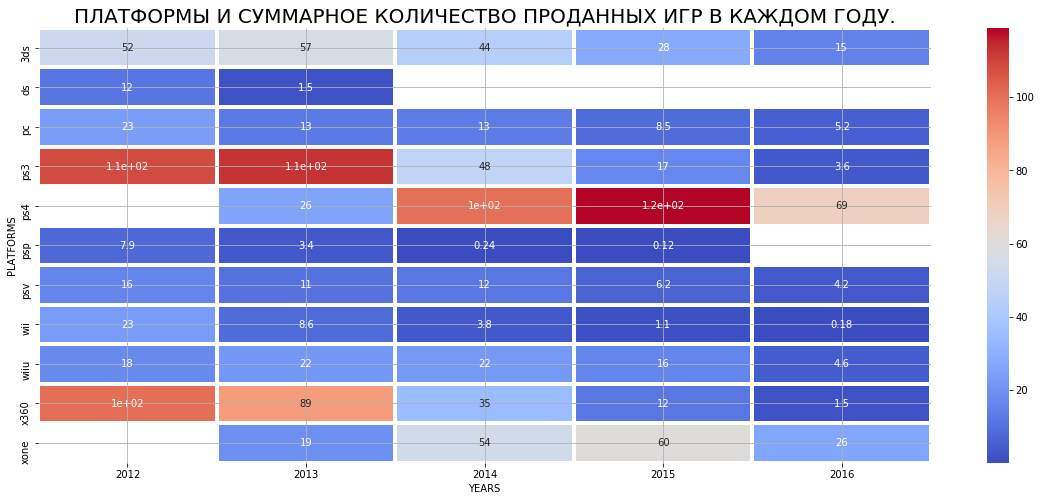

In [42]:
plt.figure(figsize=(20, 8))
plt.title('ПЛАТФОРМЫ И СУММАРНОЕ КОЛИЧЕСТВО ПРОДАННЫХ ИГР В КАЖДОМ ГОДУ.', fontsize=20)
(sns
 .heatmap(df_with_forecast.pivot_table(index='platform', columns='year_of_release', values='total_sales', aggfunc='sum'), annot=True, cmap="coolwarm",linewidths=3))
plt.ylabel('PLATFORMS')
plt.xlabel('YEARS')
plt.grid(True);

**Потенциально прибыльными платформами будут: 3DS, XONE, PS4, WIIU, PC.**

**Большинство платформ к 2016 году либо перестали выпускать игры, либо тенденция по выпуску игр пошла на спад.**

**Выше перечисленные плтаформы в соответствие с графиком появились недавно, а их тенденция к выпуску игр имеет положительную динамику. PC  же  хоть и имеет неоднозначную динамику, но не строго отрицательную и имеет значительный объем ежегодно выпускаемых игр. Считаю, что эта платформа будет оставаться актуальной долгое время.**

### Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

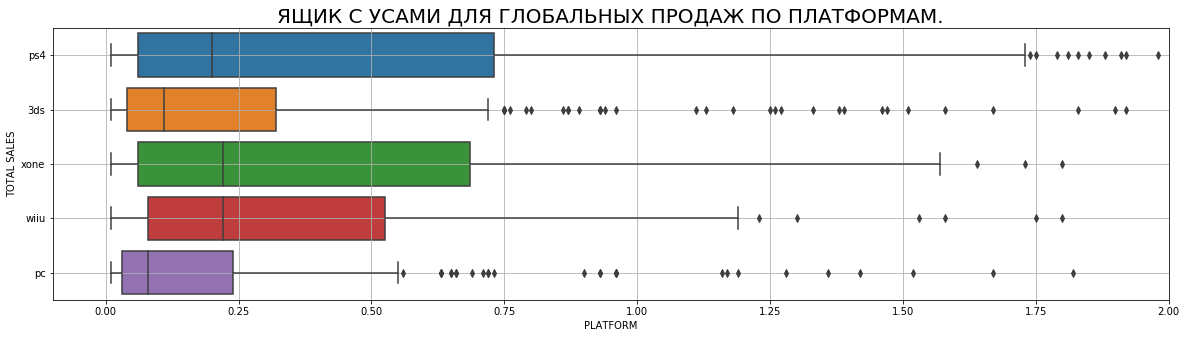

In [43]:
list_with_promising_platforms = ['ps4', 'xone', 'wiiu', '3ds', 'pc']
df_with_promossing_platform = df_with_forecast[df_with_forecast['platform'].isin(list_with_promising_platforms)]

plt.figure(figsize=(20, 5))
plt.xlim(-0.1, 2)
plt.title('ЯЩИК С УСАМИ ДЛЯ ГЛОБАЛЬНЫХ ПРОДАЖ ПО ПЛАТФОРМАМ.', fontsize=20)
sns.boxplot(x='total_sales', y='platform', data=df_with_promossing_platform, orient='h')
plt.ylabel('TOTAL SALES')
plt.xlabel('PLATFORM')
plt.grid(True);

**По графику можно сказать, что большего всего продаются игры для PS4, XBOXONE, WIIU.**

**На графике:**

1. **Медиана у лидеров находится дальше остальных. Разброс больше, так как значений (продаж) больше, средняя/медианная прибыль больше.**

2. **Размах усов для ящиков ограничен минимуом и максимумом, и он шире чем у двух других консолей. Это значит, что в диапазон попадает большое количество значений(нормальных ). Обьянятется тем, что платформы имеют большое число продаж. Выбросы и аномалии находятся за приделами усов.**

### Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами.

In [44]:
df_for_ps4 = df_with_promossing_platform[(df_with_promossing_platform['platform'] == 'ps4') & (df_with_promossing_platform['user_score'] != -1) & (df_with_promossing_platform['user_score'] != 0) ]

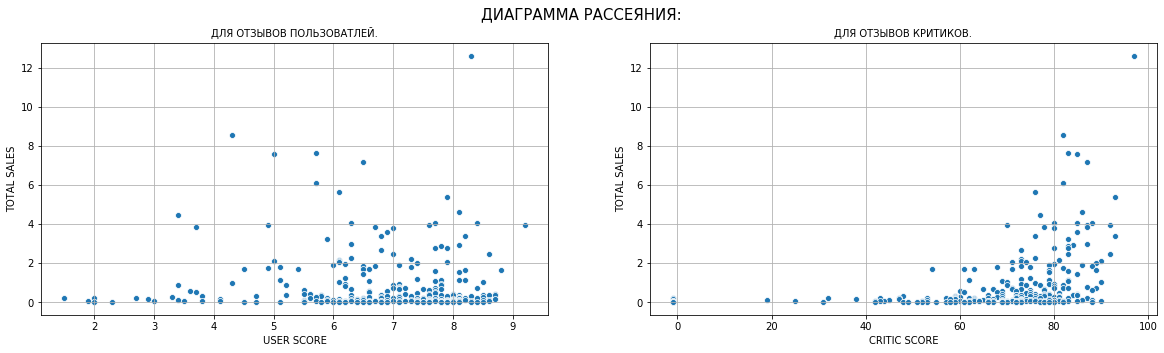

In [45]:
plt.figure(figsize=(20, 5))
plt.suptitle('ДИАГРАММА РАССЕЯНИЯ:', fontsize=15)

plt.subplot(1, 2, 1)
plt.title('ДЛЯ ОТЗЫВОВ ПОЛЬЗОВАТЛЕЙ.', fontsize=10)
sns.scatterplot(x='user_score', y='total_sales', data=df_for_ps4)
plt.ylabel('TOTAL SALES')
plt.xlabel('USER SCORE')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.title('ДЛЯ ОТЗЫВОВ КРИТИКОВ.', fontsize=10)
sns.scatterplot(x='critic_score', y='total_sales', data=df_for_ps4)
plt.ylabel('TOTAL SALES')
plt.xlabel('CRITIC SCORE')
plt.grid(True);

In [46]:
cor_with_critic_score = df_for_ps4['total_sales'].corr(df_for_ps4['critic_score'].astype('float32'))
cor_with_user_score = df_for_ps4['total_sales'].corr(df_for_ps4['user_score'])
print(f'\nКоэффицент корреляции для отзывов критиков - {cor_with_critic_score:.2f}')
print(f'\nКоэффицент корреляции для отзывов пользователей - {cor_with_user_score:.2f}')


Коэффицент корреляции для отзывов критиков - 0.35

Коэффицент корреляции для отзывов пользователей - -0.03


**Коэффиценты корреляции для оценки критиков положительный. Отзывы оказывают влияние, умеренное. Мнение критиков имеет превосходство над мнение пользователей.**

### Соотнесем выводы с продажами игр на других платформах.

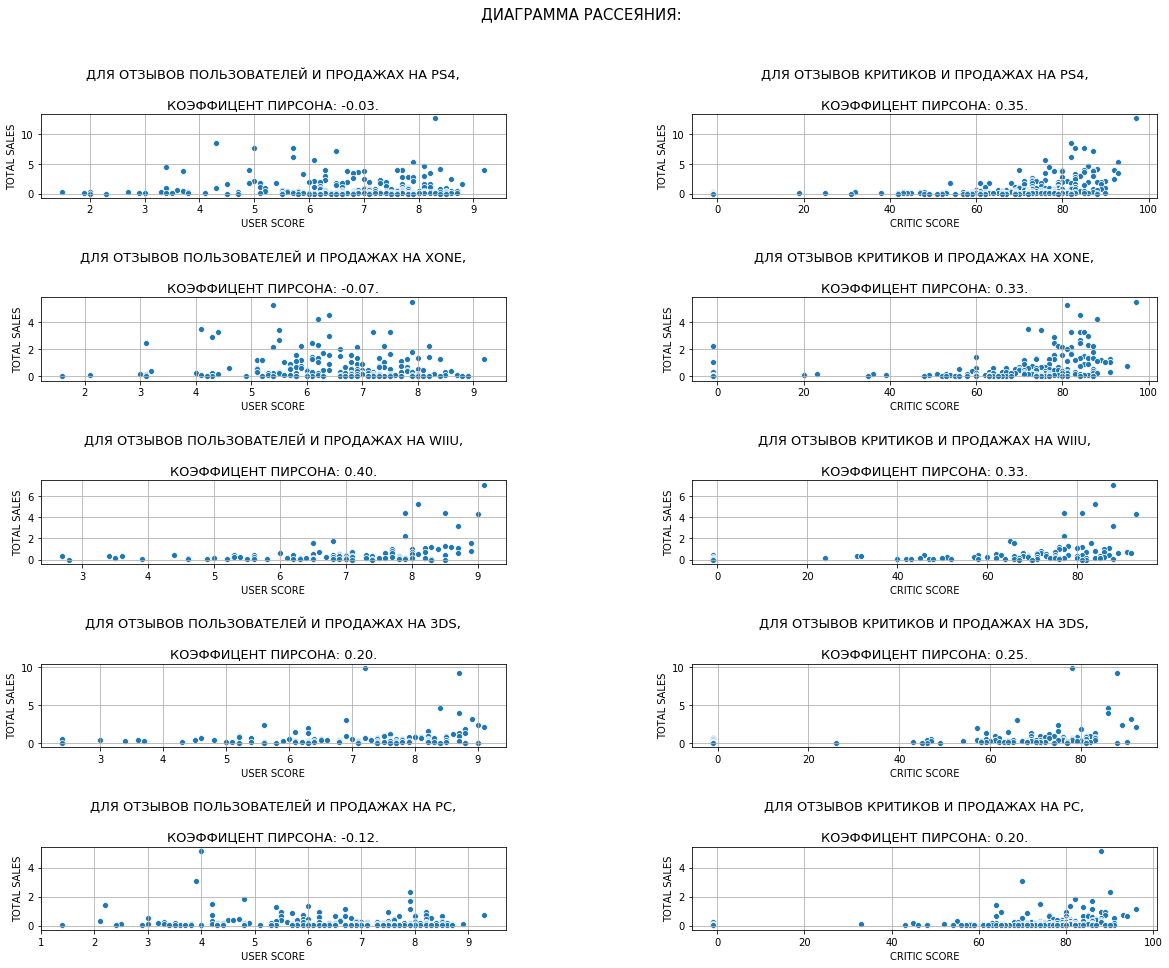

In [47]:
position = 0
plt.figure(figsize=[20,15])
plt.subplots_adjust(wspace=0.4, hspace=1.2)
plt.suptitle('ДИАГРАММА РАССЕЯНИЯ:', fontsize=15)

for name_of_platform in list_with_promising_platforms:
    position += 1
    df_for_console = df_with_promossing_platform[(df_with_promossing_platform['platform'] == name_of_platform) & (df_with_promossing_platform['user_score'] != 0) & (df_with_promossing_platform['user_score'] != -1)]
    
    plt.subplot(5, 2, position)
    cor_with_user_score = df_for_console['total_sales'].corr(df_for_console['user_score'])
    plt.title(f'ДЛЯ ОТЗЫВОВ ПОЛЬЗОВАТЕЛЕЙ И ПРОДАЖАХ НА {name_of_platform.upper()},\n\nКОЭФФИЦЕНТ ПИРСОНА: {cor_with_user_score:.2f}.', fontsize=13)
    sns.scatterplot(x='user_score', y='total_sales', data=df_for_console)
    plt.xlabel('USER SCORE')
    plt.ylabel('TOTAL SALES')
    plt.grid(True)
    
    position += 1
    plt.subplot(5, 2, position)
    cor_with_critic_score = df_for_console['total_sales'].corr(df_for_console['critic_score'].astype('float32'))
    plt.title(f'ДЛЯ ОТЗЫВОВ КРИТИКОВ И ПРОДАЖАХ НА {name_of_platform.upper()},\n\nКОЭФФИЦЕНТ ПИРСОНА: {cor_with_critic_score:.2f}.', fontsize=13)
    sns.scatterplot(x='critic_score', y='total_sales', data=df_for_console)
    plt.xlabel('CRITIC SCORE')
    plt.ylabel('TOTAL SALES')
    plt.grid(True);


**Влияние отзывов пользователей на продажи пока велико для WIIU и 3DS. Влияние мнения критиков, хоть и не имеет высоких показателей в общем, но значительно выше влияния пользователских оценок.**

**Исходя из такой корреляции можно предположить, что данное являение может иметь определенный успех в будущем для продаж.**

**Относительно всех платформ - самое сильное влияние отзывов критиков и пользователей у консоли WIIU, а самое слабое у PC.**

### Посмотрим на общее распределение игр по жанрам.

In [48]:
# all_genre_and_total_sales = df_with_promossing_platform.pivot_table(index='genre', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False).reset_index()
# plt.figure(figsize=(20, 5))
# plt.title('ЖАНРЫ И СУММАРНОЕ КОЛИЧЕСТВО ПРОДАННЫХ ИГР.', fontsize=20)
# sns.barplot(x='genre', y='total_sales', data=all_genre_and_total_sales)
# plt.ylabel('TOTAL SALES')
# plt.xlabel('GENRE')
# plt.grid(True);

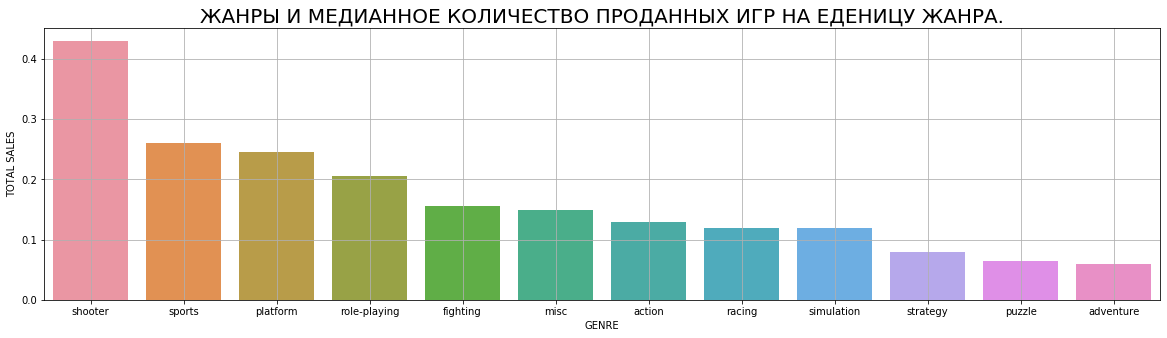

In [49]:
all_genre_and_total_sales = df_with_promossing_platform.pivot_table(index='genre', values='total_sales', aggfunc='median').sort_values(by='total_sales', ascending=False).reset_index()
plt.figure(figsize=(20, 5))
plt.title('ЖАНРЫ И МЕДИАННОЕ КОЛИЧЕСТВО ПРОДАННЫХ ИГР НА ЕДЕНИЦУ ЖАНРА.', fontsize=20)
sns.barplot(x='genre', y='total_sales', data=all_genre_and_total_sales)
plt.ylabel('TOTAL SALES')
plt.xlabel('GENRE')
plt.grid(True);

**Самый популярный жанр - "shooter", у него больше всего продаж, а меньше всего у "adventure", этот жанр менее популярен.**

**Наибольшую популярность имеют жанры: "shooter", "sports", "platform", "role-playing". У них наибольшее количество продаж с отрывом от остальных."**

### Вывод

**Средний срок жизни игровой платформы составляет 11 лет. Потенциально прибыльными платформами на период с 2017 года считаю: 3DS, XONE, PS4, WIIU, PC. Они появились недавно, и имею положительную динамику роста количества продаж игр.**

**Мнения критиков влияет на количество продаж, хоть и не сильно, зато жанр имеет большее значение. Игроки больше ценят: "shooter", "sports", "platform", "role-playing".** 

## Составим портрет пользователя каждого региона.

### Определим для пользователя каждого региона (NA, EU, JP) самые популярные платформы (топ-5).

In [50]:
forecast_for_na = df_with_forecast.loc[:, 'name':'genre']
forecast_for_na['na_sales'] = df_with_forecast['na_sales']
forecast_for_na['rating'] = df_with_forecast['rating']

forecast_for_eu = df_with_forecast.loc[:, 'name':'genre']
forecast_for_eu['eu_sales'] = df_with_forecast['eu_sales']
forecast_for_eu['rating'] = df_with_forecast['rating']

forecast_for_jp = df_with_forecast.loc[:, 'name':'genre']
forecast_for_jp['jp_sales'] = df_with_forecast['jp_sales']
forecast_for_jp['rating'] = df_with_forecast['rating']

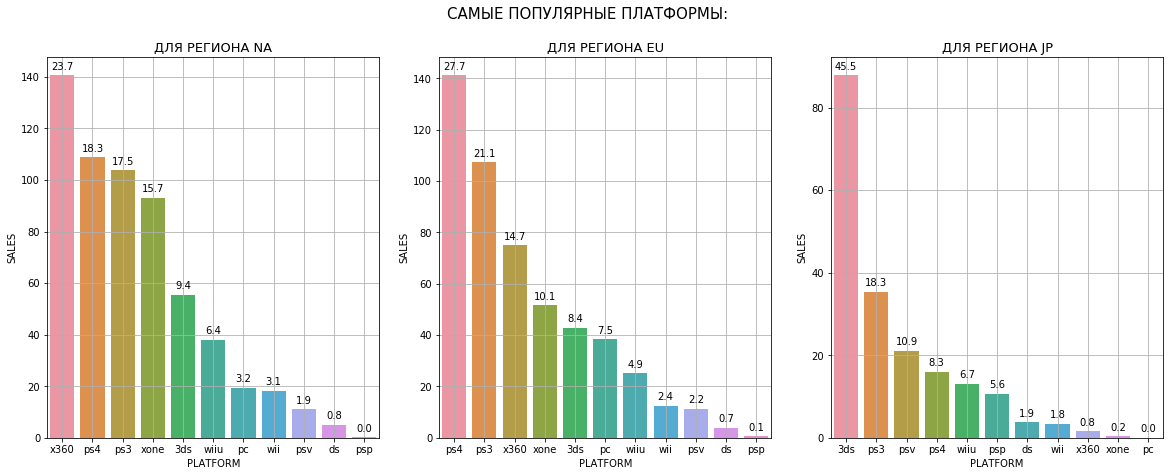

In [51]:
position = 0
plt.figure(figsize=[20, 7])
plt.subplots_adjust(wspace=0.18, hspace=0.3)
plt.suptitle('САМЫЕ ПОПУЛЯРНЫЕ ПЛАТФОРМЫ:', fontsize=15)
for region, forecast_for_region in {'na_sales': forecast_for_na, 'eu_sales': forecast_for_eu, 'jp_sales': forecast_for_jp}.items():
    position += 1
    all_sales_in_region = forecast_for_region[region].sum()
    total_sales_for_regin_by_platform = forecast_for_region.pivot_table(index='platform',
                                                                        values=region,
                                                                        aggfunc='sum').sort_values(by=region,
                                                                                                   ascending=False).reset_index()
    plt.subplot(1, 3, position)
    plt.title(f'ДЛЯ РЕГИОНА {region[0:2].upper()}', fontsize=13)
    pop_platform = sns.barplot(x='platform', y=region, data=total_sales_for_regin_by_platform)
    for p in pop_platform.patches:
        pop_platform.annotate(format(p.get_height() / all_sales_in_region * 100, '.1f'), 
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha = 'center', va = 'center', 
        xytext = (0, 9), 
        textcoords = 'offset points')
    plt.ylabel('SALES')
    plt.xlabel('PLATFORM')
    plt.grid(True);
    
#     position += 1
#     sizes = []
#     labels = list(total_sales_for_regin_by_platform['platform'])
#     all_sales_in_region = forecast_for_region[region].sum()
#     for plfrm in labels:
#         sz = (forecast_for_region.query('platform == @plfrm')[region].sum() / all_sales_in_region) * 100
#         sizes.append(sz)
#     plt.subplot(3, 2, position)
#     plt.title(f'ДОЛЯ ПРОДАЖ ИГР ПО ПЛАТФОРМАМ РЕГИОНА {region[0:2].upper()}', fontsize=13)
#     plt.pie(sizes,
#             shadow=True,
#             startangle=140,)
#     text_for_legend = [f'{l}, {s:0.1f}%' for l, s in zip(labels, sizes)]
#     plt.legend(loc ='upper right', labels=text_for_legend)
#     plt.axis('equal');
    

 - **<u>Для Северной Америки самыми популярными платформами являются:</u>**

1. **XBOX360 - у нее 23.7% от общего числа продаж в регионе.**


2. **PS4 - у нее 18.3% от общего числа продаж в регионе.**


3. **PS3 - у нее 17.5% от общего числа продаж в регионе.**


4. **XONE - у нее 15.7% от общего числа продаж в регионе.**


5. **3DS - у нее 9.4% от общего числа продаж в регионе.**

 - **<u>Для Европейского региона самыми популярными платформами являются:</u>**


1. **PS4 - у нее 27.7% от общего числа продаж в регионе.**


2. **PS3 - у нее 21.1% от общего числа продаж в регионе.**


3. **XBOX360 - у нее 14.7% от общего числа продаж в регионе.**


4. **XONE - у нее 10.1% от общего числа продаж в регионе.**


5. **3DS - у нее 8.4% от общего числа продаж в регионе.**

 - **<u>Для Японии самыми популярными платформами являются:</u>**


1. **3DS - у нее 45.5% от общего числа продаж в регионе.**


2. **PS3 - у нее 18.3% от общего числа продаж в регионе.**


3. **PSV - у нее 10.9% от общего числа продаж в регионе.**


4. **PS4 - у нее 8.3% от общего числа продаж в регионе.**


5. **WIIU - у нее 6.7% от общего числа продаж в регионе.**

### Определим для пользователя каждого региона (NA, EU, JP) cамые популярные жанры (топ-5).

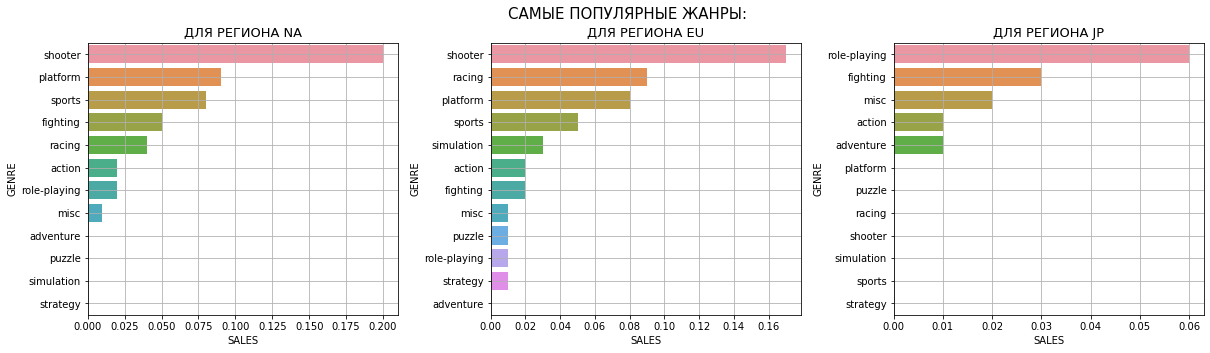

In [52]:
position = 0
plt.figure(figsize=[20, 5])
plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.suptitle('САМЫЕ ПОПУЛЯРНЫЕ ЖАНРЫ:', fontsize=15)
for region, forecast_for_region in {'na_sales': forecast_for_na, 'eu_sales': forecast_for_eu, 'jp_sales': forecast_for_jp}.items():
    position += 1
    total_sales_for_regin_by_genre = forecast_for_region.pivot_table(index='genre',
                                                                        values=region,
                                                                        aggfunc='median').sort_values(by=region,
                                                                                                   ascending=False).reset_index()
    plt.subplot(1, 3, position)
    plt.title(f'ДЛЯ РЕГИОНА {region[0:2].upper()}', fontsize=13)
    sns.barplot(x=region, y='genre', data=total_sales_for_regin_by_genre)
    plt.ylabel('GENRE')
    plt.xlabel('SALES')
    plt.grid(True);

 - **<u>Для Северной Америки самыми популярными платформами являются:</u>**

1. **SHOOTER**


2. **PLATFORM**


3. **SPORTS**


4. **FIGHTING**


5. **RACING**

 - **<u>Для Европейского региона самыми популярными платформами являются:</u>**


1. **SHOOTER**


2. **RACING**


3. **PLATFORM**


4. **SPORTS**


5. **SIMULATION**

 - **<u>Для Японии самыми популярными платформами являются:</u>**


1. **ROLE-PLAYING**


2. **FIGHTING**


3. **MISC**


4. **ACTION**


5. **ADVENTURE**

**Разница в предпочтении жанров может быть обусловлена менталитетом и предпочтении определенных консолей.**

### Посмотрим влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [53]:
forecast_for_jp['rating'].unique()

array(['m', 'nr', 'e', 'e10+', 't'], dtype=object)

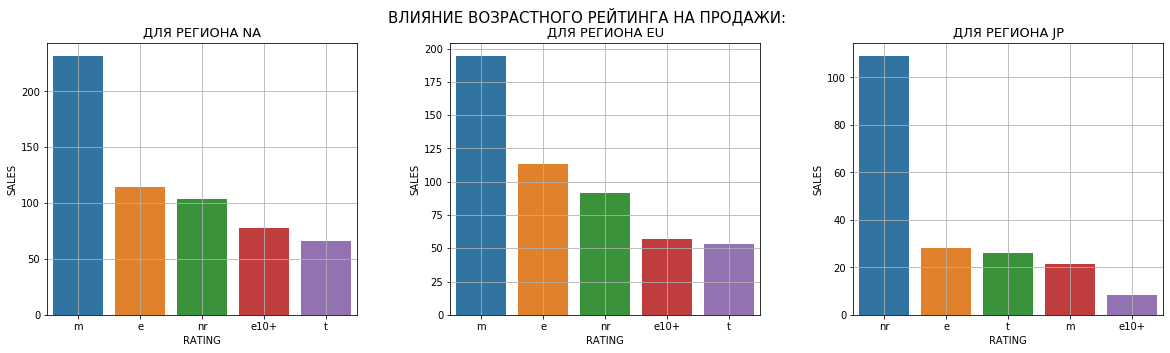

In [54]:
position = 0
plt.figure(figsize=[20, 5])
plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.suptitle('ВЛИЯНИЕ ВОЗРАСТНОГО РЕЙТИНГА НА ПРОДАЖИ:', fontsize=15)
for region, forecast_for_region in {'na_sales': forecast_for_na, 'eu_sales': forecast_for_eu, 'jp_sales': forecast_for_jp}.items():
    position += 1
    plt.subplot(1, 3, position)
    pvt = forecast_for_region.pivot_table(index='rating',
                                          values=region,
                                          aggfunc='sum').reset_index().sort_values(by=region, 
                                                                                   ascending=False).reset_index()
    plt.title(f'ДЛЯ РЕГИОНА {region[0:2].upper()}', fontsize=13)
    sns.barplot(x='rating', y=region, data=pvt)
    plt.xlabel('RATING')
    plt.ylabel('SALES')
    plt.grid(True)

 - **<u>Для Северной Америки самыми популярными являются игры с возрастным ограничением:</u>**

1. **Для всех**
2. **Для взрослых**
3. **Без рейтинга**
4. **Для подростков**
5. **Для всех от 10 лет**


 - **<u>Для Европейского региона самыми популярными являются игры с возрастным ограничением:</u>**


1. **Для всех**
2. **Для взрослых**
3. **Без рейтинга**
4. **Для подростков**
5. **Для всех от 10 лет**


 - **<u>Для Японии самыми популярными являются игры с возрастным ограничением:</u>**


1. **Без рейтинга**
2. **Для подростков**
3. **Для всех**
4. **Для взрослых**
5. **Для всех от 10 лет**

**Разница в предпочтении жанров может быть обусловлена менталитетом и предпочтении определенных консолей.**
**Отсутствие рейтинга для игры может быть обусловлен тем, что для каждого региона могла действовать своя организация. Например: PEGI,CERO.**

### Вывод

**Средний срок жизни консоли - 11 лет, необходимо своевременно обновлять каталог игр под новые консоли, что бы соответствовать тенденциям. Перспективными платформами на следующий срок будут: 3DS, XONE, PS4, WIIU, PC. На данный момент популярны консоли предыдущих версий (PS3, WII, XBOX360, DS...), а значит выбранные платформы должны иметь успех в будущем.**

**Мнение критиков и пользователей пока оказывает не сильное влияние на продажи игр. Но влияние есть (положительная корреляция), и при будущих планированиях это определенно стоит учесть, как дополнительный стимул пользователей к покупке игр.**

**Пользователи отдельных регионов сходятся в предпочтении жанров : "shooter", "sports", "platform", "role-playing". Стоит учитывать специфику региона, что бы максимально охватить аудиторию каждого.**

**Есть определенное влияние возрастного рейтинга на продажи игр. Необходимо принять во внимание и  этот фактор.Например, что бы не закупать игры не популярного рейтинга.**

## Шаг 5. Проверим гипотезы.

*Нулевая гипотеза (H₀) всегда формируется так, чтобы использовать знак равенства.   
Исходя из формулировки H₀ формуриуется альтернативная гипотеза (H₁). Это утверждение, которое принимается верным, когда отбрасывается нулевая гипотеза.*

*Пороговое значение сделаю равное 5%, как общепринятое.*

<u>*Логика проверки.*</u>

*Вычислю значение (p-value) получить наблюдаемое на выборке значение, при условии, что H₀ верна. Если значение будет большим (сравним с пороговым значением), то нулевую гипотезу не отвергаем.*

### Проверим гипотезу: "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые".

<u>***Сформируем гипотезу.***</u>

**H₀:  Средние пользовательские рейтинги платформ Xbox One равны cредним пользовательским рейтингам платформы PC.**

**H₁:  Средние пользовательские рейтинги платформ Xbox One и cредние пользовательские рейтинги платформы PC различаются. Альтернативная гипотеза говорит о проверке равенства средних двух генеральных совокупностей.**

**Дополнительно сравним дисперсии выборок до проверки гипотез, чтобы понять с каким параметром equal_var использовать метод проверки ttest_ind (по дефолту True). Дисперсии выборок сравним с помощью стат.теста Левене.**

In [55]:
alpha = .05

In [64]:
df_with_forecast = df_with_forecast[df_with_forecast['user_score'] != -1]

In [56]:
stat, p = levene(df_with_forecast.query('platform == "xone"')['user_score'],
                 df_with_forecast.query('platform == "pc"')['user_score'])

print('\nЗначение p-value: ', p)

if p > alpha:
    print('\nДисперсии выборок равны')
else:
    print('\nДисперсии выборок не равны')


Значение p-value:  0.014264562455205375

Дисперсии выборок не равны


In [57]:
print('\nРазмер совокопуности для XONE -', len(df_with_forecast.query('platform == "xone"')['user_score']))
print('\nРазмер совокопуности для PC -', len(df_with_forecast.query('platform == "pc"')['user_score']))


Размер совокопуности для XONE - 182

Размер совокопуности для PC - 211


***Размер совокупностей и дисперсии выборок не равны. Поэтому в методе ttest_ind укажу параметру equal_var значение False, чтобы посчитать дисперсии выборок по отдельности.***

In [58]:
res = scipy.stats.ttest_ind(df_with_forecast.query('platform == "xone"')['user_score'],
                            df_with_forecast.query('platform == "pc"')['user_score'],
                            equal_var=False)

print('\nЗначение p-value: ', res.pvalue)

if res.pvalue < alpha:
    print('\nОтвергаем нулевую гипотезу')
else:
    print('\nНе отвергаем нулевую гипотезу')


Значение p-value:  0.6206382152087896

Не отвергаем нулевую гипотезу


**Итог проверки: пользовательские рейтинги не различаются.**

### Проверим гипотезу: "Средние пользовательские рейтинги жанров Action и Sports разные.

<u>***Сформируем гипотезу.***</u>

**H₀:  Средние пользовательские рейтинги жанра Action равны cредним пользовательским рейтингам жанра Sports.**

**H₁:  Средние пользовательские рейтинги жанров Action и cредние пользовательские рейтинги пжанра Sports различаются. Альтернативная гипотеза говорит о проверке равенства средних двух генеральных совокупностей.**

**Дополнительно сравним дисперсии выборок до проверки гипотез, чтобы понять с каким параметром equal_var использовать метод проверки ttest_ind (по дефолту True). Дисперсии выборок сравним с помощью стат.теста Левене.**

In [59]:
stat, p = levene(df_with_forecast.query('genre == "action"')['user_score'],
                 df_with_forecast.query('genre == "sports"')['user_score'])

print('\nЗначение p-value: ', p)

if p > alpha:
    print('\nДисперсии выборок равны')
else:
    print('\nДисперсии выборок не равны')


Значение p-value:  1.8018155462392233e-05

Дисперсии выборок не равны


In [60]:
print('\nРазмер совокопуности для ACTION -', len(df_with_forecast.query('genre == "action"')['user_score']))
print('\nРазмер совокопуности для SPORTS -', len(df_with_forecast.query('genre == "sports"')['user_score']))


Размер совокопуности для ACTION - 531

Размер совокопуности для SPORTS - 195


***Размеры выборок не равны, и дисперсии не одинаковы. Поэтому в методе ttest_ind укажу параметру equal_var значение False, чтобы посчитать дисперсии выборок по отдельности.***

In [61]:
res = scipy.stats.ttest_ind(df_with_forecast.query('genre == "action"')['user_score'],
                            df_with_forecast.query('genre == "sports"')['user_score'],
                            equal_var=True)

print('\nЗначение p-value: ', res.pvalue)

if res.pvalue < alpha:
    print('\nОтвергаем нулевую гипотезу')
else:
    print('\nНе отвергаем нулевую гипотезу')


Значение p-value:  1.140485434887335e-26

Отвергаем нулевую гипотезу


**Итог проверки: Пользовательские рейтинги жаров Action и Sports различаются.**

## Общий вывод.

**При опредлелении популярности продукта стоит учитывать:**

1. **Популярность жанра, с учетом специфики(предпочтений) региона, для максимального охвата аудитории в каждом.**


2. **Популярность платформ, для выбора продукта под них, что бы извлечь максимальную выгоду.**


3. **Популрность возрастного рейтинга, что бы заранее исключить в будущем связанные с этим возможные убытки.**


4. **Мнение критиков, как возможное привлечение дополнительной игровой аудитории.**


5. **Будущие перспективные платформы, для занимания лидирующей позиции на рынке игр под новые консоли.**

**<u>Перспективные направления для региона:</u>**

1. **Северная Америка**

    Плафторма: PS4, XONE
    
    Жанр: Shooter, Platform
    
    Рейтинг:  m, e


2. **Европа**

    Плафторма: PS4, XONE
    
    Жанр: Shooter, Racing
    
    Рейтинг: m, e


3. **Япония**

    Плафторма: PS4, WIIU
    
    Жанр: Role-playing, Fighting
    
    Рейтинг: nr, e